35.30447303557974
35.30447303557974
35.30447303557974
35.45503581800062
35.45503581800062
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.38368403977908
36.3836840

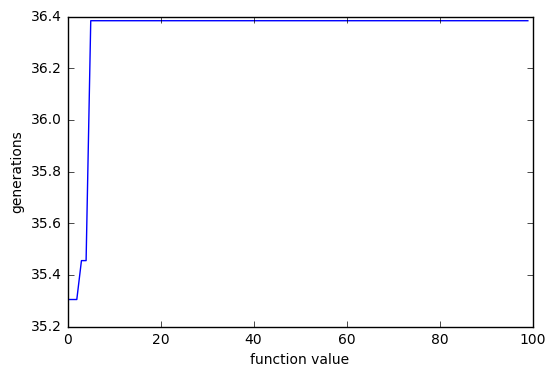

In [3]:
import copy
import random
import matplotlib.pyplot as plt


import math
import random


class Chromosome:
    def __init__(self, bounds, precision):
        self.x1 = 1
        self.x2 = 1

        self.y = 0

        self.code_x1 = ''
        self.code_x2 = ''

        self.bounds = bounds

        temp1 = (bounds[0][1] - bounds[0][0]) * precision
        self.code_x1_length = math.ceil(math.log(temp1, 2))

        temp2 = (bounds[1][1] - bounds[1][0]) * precision
        self.code_x2_length = math.ceil(math.log(temp2, 2))

        self.rand_init()
        self.func()


    def rand_init(self):
        for i in range(self.code_x1_length):
            self.code_x1 += str(random.randint(0, 1))

        for i in range(self.code_x2_length):
            self.code_x2 += str(random.randint(0, 1))

    def decoding(self, code_x1, code_x2):
        self.x1 = self.bounds[0][0] + int(code_x1, 2) * (self.bounds[0][1] - self.bounds[0][0]) / (
        2 ** self.code_x1_length - 1)
        self.x2 = self.bounds[1][0] + int(code_x2, 2) * (self.bounds[1][1] - self.bounds[1][0]) / (
        2 ** self.code_x2_length - 1)

    def func(self):
        self.decoding(self.code_x1, self.code_x2)
        self.y = 21.5 + self.x1 * math.sin(4 * math.pi * self.x1) + self.x2 * math.sin(20 * math.pi * self.x2)



class GeneticAlgorithm:

    def __init__(self, bounds, precision, pm, pc, pop_size, max_gen):
        """
        算法初始化
        :param bounds: 变量范围
        :param precision: 精度
        :param pm: 变异概率
        :param pc: 交叉概率
        :param pop_size: 种群大小
        :param max_gen: 最大迭代次数
        :return:
        """
        self.bounds = bounds
        self.precision = precision
        self.pm = pm
        self.pc = pc
        self.pop_size = pop_size
        self.max_gen = max_gen

        self.pop = []
        self.bests = [0] * max_gen
        self.g_best = 0

    def ga(self):
        """
        算法主函数
        :return:
        """
        self.init_pop()
        best = self.find_best()
        self.g_best = copy.deepcopy(best)
        y = [0] * self.pop_size
        for i in range(self.max_gen):
            self.cross()
            self.mutation()
            self.select()
            best = self.find_best()
            self.bests[i] = best
            if self.g_best.y < best.y:
                self.g_best = copy.deepcopy(best)
            y[i] = self.g_best.y
            print(self.g_best.y)

        # plt
        plt.figure(1)
        x = range(self.pop_size)
        plt.plot(x, y)
        plt.ylabel('generations')
        plt.xlabel('function value')
        plt.show()


    def init_pop(self):
        """
        初始化种群
        :return:
        """
        for i in range(self.pop_size):
            chromosome = Chromosome(self.bounds, self.precision)
            self.pop.append(chromosome)

    def cross(self):
        """
        交叉
        :return:
        """
        for i in range(int(self.pop_size / 2)):
            if self.pc > random.random():
                # randon select 2 chromosomes in pops
                i = 0
                j = 0
                while i == j:
                    i = random.randint(0, self.pop_size-1)
                    j = random.randint(0, self.pop_size-1)
                pop_i = self.pop[i]
                pop_j = self.pop[j]

                # select cross index
                pop_1 = random.randint(0, pop_i.code_x1_length - 1)
                pop_2 = random.randint(0, pop_i.code_x2_length - 1)

                # get new code
                new_pop_i_code1 = pop_i.code_x1[0: pop_1] + pop_j.code_x1[pop_1: pop_i.code_x1_length]
                new_pop_i_code2 = pop_i.code_x2[0: pop_2] + pop_j.code_x2[pop_2: pop_i.code_x2_length]

                new_pop_j_code1 = pop_j.code_x1[0: pop_1] + pop_i.code_x1[pop_1: pop_i.code_x1_length]
                new_pop_j_code2 = pop_j.code_x2[0: pop_2] + pop_i.code_x2[pop_2: pop_i.code_x2_length]

                pop_i.code_x1 = new_pop_i_code1
                pop_i.code_x2 = new_pop_i_code2

                pop_j.code_x1 = new_pop_j_code1
                pop_j.code_x2 = new_pop_j_code2

    def mutation(self):
        """
        变异
        :return:
        """
        for i in range(self.pop_size):
            if self.pm > random.random():
                pop = self.pop[i]
                # select mutation index
                index1 = random.randint(0, pop.code_x1_length-1)
                index2 = random.randint(0, pop.code_x2_length-1)

                i = pop.code_x1[index1]
                i = self.__inverse(i)
                pop.code_x1 = pop.code_x1[:index1] + i + pop.code_x1[index1+1:]

                i = pop.code_x2[index2]
                i = self.__inverse(i)
                pop.code_x2 = pop.code_x2[:index2] + i + pop.code_x2[index2+1:]


    def select(self):
        """
        轮盘赌选择
        :return:
        """
        # calculate fitness function
        sum_f = 0
        for i in range(self.pop_size):
            self.pop[i].func()

        # guarantee fitness > 0
        min = self.pop[0].y
        for i in range(self.pop_size):
            if self.pop[i].y < min:
                min = self.pop[i].y
        if min < 0:
            for i in range(self.pop_size):
                self.pop[i].y = self.pop[i].y + (-1) * min

        # roulette
        for i in range(self.pop_size):
            sum_f += self.pop[i].y
        p = [0] * self.pop_size
        for i in range(self.pop_size):
            p[i] = self.pop[i].y / sum_f
        q = [0] * self.pop_size
        q[0] = 0
        for i in range(self.pop_size):
            s = 0
            for j in range(0, i+1):
                s += p[j]
            q[i] = s
        # start roulette
        v = []
        for i in range(self.pop_size):
            r = random.random()
            if r < q[0]:
                v.append(self.pop[0])
            for j in range(1, self.pop_size):
                if q[j - 1] < r <= q[j]:
                    v.append(self.pop[j])
        self.pop = v

    def find_best(self):
        """
        找到当前种群中最好的个体
        :return:
        """
        best = copy.deepcopy(self.pop[0])
        for i in range(self.pop_size):
            if best.y < self.pop[i].y:
                best = copy.deepcopy(self.pop[i])
        return best

    def __inverse(self, i):
        """
        变异时候用的，将 1 变为 0 ，0 变为 1
        :param i: 变异位置
        :return:
        """
        r = '1'
        if i == '1':
            r = '0'
        return r

if __name__ == '__main__':
    bounds = [[-3, 12.1], [4.1, 5.8]]
    precision = 100000
    algorithm = GeneticAlgorithm(bounds, precision, 0.01, 0.8, 100, 100)
    algorithm.ga()
    pass